In [158]:
def escaleta():
    '''
    1. #Importar Librerías
    2. #explorar la web de INE y descargar csv migration_spain
    3. #Verificacion nulos y tamaños
    4. #Encabezados separar comunidades de códigos
    5. #Convertir a valores absolutos, habían datos con signo negativo
    6. #Encabezados separar año de semestre   
    7. #Tabla agrupada por comunidades autónomas y año
    8. #Análsis gráfico por CCAA
    9. ##seleccionar el año 2022 (la última columna)
    10. #Elegimos a la CCAA de Madrid
    11. #api ayuntamiento de madrid madrid
    12. #Se conecta, más no envía los datos
    13. #Descargamos ese estudio de la caaa de Madrid en CSV
    14. #LImpiar duplicados y eliminar nulos
    15. #Seleccionar año 2022 en barrios
    16. #gráfico de barrios
    17. #Pivot de género y personas extranjeras
    18 #Web Scrapping datos.gob.es
    19. #Request, conctada
    20. #print(data) 
    21. #Importando beautiful Soup
    22. #encontramos links que tengan coincidencias con el contenido de "csv"
    23. #Descargamos el link del año 2022 para obtener datos
    24. #Análisis exploratorio
    25. #Elimino las 291 últimas filas porque estabana en Blanco, "nan"
    26. #Top 5 nacionalidades
    27. #histograma general
    28. #Tabla cruzada de situación administrativa y género
    29. #exportar a csv
    
    
    
    
    

       
    '''
    return None

help(escaleta)

Help on function escaleta in module __main__:

escaleta()
    1. #Importar Librerías
    2. #explorar la web de INE y descargar csv migration_spain
    3. #Verificacion nulos y tamaños
    4. #Encabezados separar comunidades de códigos
    5. #Convertir a valores absolutos, habían datos con signo negativo
    6. #Encabezados separar año de semestre   
    7. #Tabla agrupada por comunidades autónomas y año
    8. #Análsis gráfico por CCAA
    9. ##seleccionar el año 2022 (la última columna)
    10. #Elegimos a la CCAA de Madrid
    11. #api ayuntamiento de madrid madrid
    12. #Se conecta, más no envía los datos
    13. #Descargamos ese estudio de la caaa de Madrid en CSV
    14. #LImpiar duplicados y eliminar nulos
    15. #Seleccionar año 2022 en barrios
    16. #gráfico de barrios
    17. #Pivot de género y personas extranjeras
    18 #Web Scrapping datos.gob.es
    19. #Request, conctada
    20. #print(data) 
    21. #Importando beautiful Soup
    22. #encontramos links que tengan 

In [114]:
#Importar Librerías
#%pip install ipython
#%pip install pandas
#%pip install seaborn
#%matplotlib inline

In [115]:
import pandas as pd
import numpy as np
import pylab as plt   
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # para quitar esos prints

In [116]:
#explorar la web de INE y descargar csv
migration = pd.read_csv('./data/migration_spain.csv', sep=';', error_bad_lines=False, encoding='utf-8')
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754


In [117]:
#Verificacion nulos y tamaños
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Comunidades y ciudades autónomas  20938 non-null  object
 1   Sexo                              20938 non-null  object
 2   País de nacimiento                20938 non-null  object
 3   Grupo quinquenal de edad          20938 non-null  object
 4   Periodo                           20938 non-null  object
 5   Total                             20938 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 981.6+ KB


In [118]:
nan_cols = migration.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

In [119]:
#Encabezados, separar comunidades de códigos
df_mig= migration[['Codigo', 'Comunidades']] = migration['Comunidades y ciudades autónomas'].str.split(' ', 1, expand=True)
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,Comunidades
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433,01,Andalucía
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968,01,Andalucía
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634,01,Andalucía
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721,01,Andalucía
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754,01,Andalucía


In [120]:
#Convertir a valores absolutos, habían datos con signo negativo
migration['Total'] = abs(migration['Total'])

In [121]:
#Encabezados, separar año de semestre
df_mig= migration[['año', 'semestre']] = migration['Periodo'].str.split('S', 1, expand=True)
migration.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,Comunidades,año,semestre
0,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2022S1,1433,01,Andalucía,2022,1
1,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S2,968,01,Andalucía,2021,2
2,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2021S1,634,01,Andalucía,2021,1
3,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S2,721,01,Andalucía,2020,2
4,01 Andalucía,Hombres,Extranjero,De 0 a 4 años,2020S1,754,01,Andalucía,2020,1


In [122]:
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20938 entries, 0 to 20937
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Comunidades y ciudades autónomas  20938 non-null  object
 1   Sexo                              20938 non-null  object
 2   País de nacimiento                20938 non-null  object
 3   Grupo quinquenal de edad          20938 non-null  object
 4   Periodo                           20938 non-null  object
 5   Total                             20938 non-null  int64 
 6   Codigo                            20938 non-null  object
 7   Comunidades                       20938 non-null  object
 8   año                               20938 non-null  object
 9   semestre                          20938 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.6+ MB


In [123]:
#seleccionar el año 2022 (la última columna)
df_2022 = migration[migration["año"] == "2022"]
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 20909
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Comunidades y ciudades autónomas  722 non-null    object
 1   Sexo                              722 non-null    object
 2   País de nacimiento                722 non-null    object
 3   Grupo quinquenal de edad          722 non-null    object
 4   Periodo                           722 non-null    object
 5   Total                             722 non-null    int64 
 6   Codigo                            722 non-null    object
 7   Comunidades                       722 non-null    object
 8   año                               722 non-null    object
 9   semestre                          722 non-null    object
dtypes: int64(1), object(9)
memory usage: 62.0+ KB


In [124]:
#Tabla agrupada por comunidades autónomas y año
pivot_ccaa = pd.pivot_table(df_2022, values='Total', index='Comunidades', columns='año', aggfunc='sum')
pivot_ccaa

año,2022
Comunidades,
Andalucía,34252
Aragón,6156
"Asturias, Principado de",3954
"Balears, Illes",9774
Canarias,13615
Cantabria,2909
Castilla - La Mancha,11304
Castilla y León,9659
Cataluña,48621


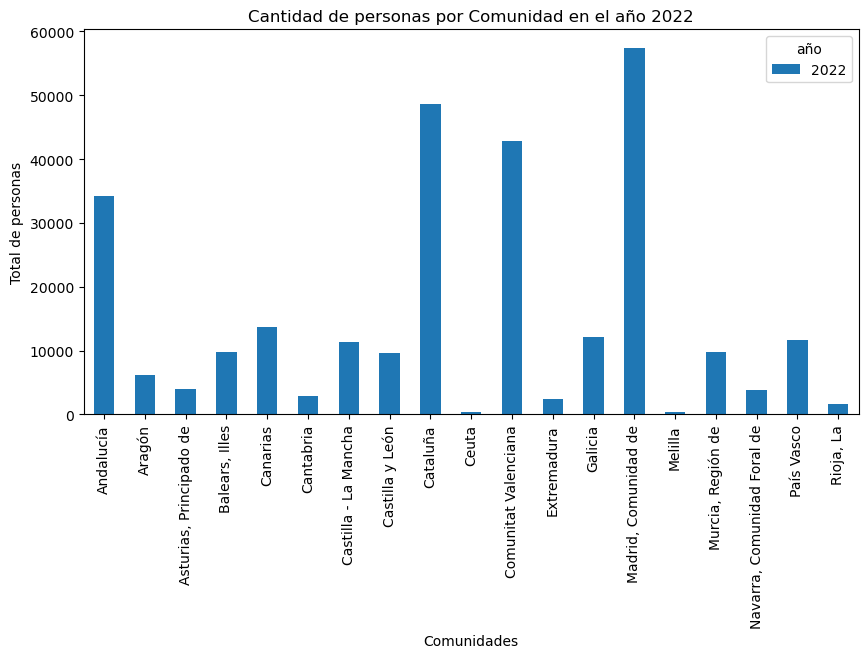

In [125]:
#Análsis gráfico por CCAA   
pivot_ccaa.plot(kind='bar', figsize=(10,5))


plt.xlabel('Comunidades')
plt.ylabel('Total de personas')
plt.title('Cantidad de personas por Comunidad en el año 2022')

plt.show()


In [126]:
#Elegimos a la CCAA de Madrid
df_cm_2022 = df_2022[(df_2022["Comunidades"] == "Madrid, Comunidad de") & (df_2022["año"] == "2022")].drop(columns=["Comunidades"])
df_cm_2022["año"] = pd.to_numeric(df_cm_2022["año"], downcast="integer")
df_cm_2022.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,año,semestre
13224,"13 Madrid, Comunidad de",Hombres,Extranjero,De 0 a 4 años,2022S1,1871,13,2022,1
13253,"13 Madrid, Comunidad de",Hombres,Extranjero,De 5 a 9 años,2022S1,2086,13,2022,1
13282,"13 Madrid, Comunidad de",Hombres,Extranjero,De 10 a 14 años,2022S1,2069,13,2022,1
13311,"13 Madrid, Comunidad de",Hombres,Extranjero,De 15 a 19 años,2022S1,2751,13,2022,1
13340,"13 Madrid, Comunidad de",Hombres,Extranjero,De 20 a 24 años,2022S1,4211,13,2022,1


In [127]:
#api ayuntamiento de madrid madrid
url_mad=('https://datos.madrid.es/egob/catalogo/title/Estructura%20de%20la%20poblaci%C3%B3n%20por%20nacionalidad..json')

In [128]:
#res_mad = req.get(url_mad)
#res_mad

In [129]:
#Se conecta, más no envía los datos
#df_mad=pd.DataFrame(res_mad)
#df_mad

In [130]:
#res_mad.json()

In [131]:
#Descargamos ese estudio de la caaa de Madrid en CSV
barrios = pd.read_csv('./data/panel_indicadores_distritos_barrios.csv', sep=';', error_bad_lines=False, encoding='latin-1')
barrios.head()

,Orden,Periodo panel,ciudad,cod_distrito,distrito,cod_barrio,barrio,año,fecha_indicador,fuente_indicador,categoría_1,categoría_2,indicador_nivel1,indicador_nivel2,indicador_nivel3,unidad_indicador,indicador_completo,valor_indicador
0,1,2019,Ciudad de Madrid,NaN,NaN,NaN,NaN,2019,01/01/2019,Estadística Ayuntamiento de Madrid,Características Generales del Distrito-Barrio,NaN,Superficie,NaN,NaN,Ha,Superficie (Ha.),60.446
1,2,2019,Ciudad de Madrid,NaN,NaN,NaN,NaN,2019,01/01/2019,Estadística Ayuntamiento de Madrid,Características Generales del Distrito-Barrio,NaN,Población densidad de población,NaN,NaN,Habitantes/Ha.,Población densidad (hab./Ha.),54
2,3,2019,Ciudad de Madrid,NaN,NaN,NaN,NaN,2019,01/01/2019,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,NaN,NaN,Habitantes,Número Habitantes,3.266.126
3,4,2019,Ciudad de Madrid,NaN,NaN,NaN,NaN,2019,01/01/2019,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,Hombres,NaN,Habitantes,Población Hombres,1.521.178
4,5,2019,Ciudad de Madrid,NaN,NaN,NaN,NaN,2019,01/01/2019,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,Mujeres,NaN,Habitantes,Población Mujeres,1.744.948


In [132]:
barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55513 entries, 0 to 55512
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Orden               55513 non-null  int64  
 1   Periodo panel       55513 non-null  object 
 2   ciudad              55513 non-null  object 
 3   cod_distrito        54686 non-null  float64
 4   distrito            54686 non-null  object 
 5   cod_barrio          41505 non-null  float64
 6   barrio              41505 non-null  object 
 7   año                 55513 non-null  int64  
 8   fecha_indicador     55513 non-null  object 
 9   fuente_indicador    55513 non-null  object 
 10  categoría_1         55510 non-null  object 
 11  categoría_2         50875 non-null  object 
 12  indicador_nivel1    55510 non-null  object 
 13  indicador_nivel2    48839 non-null  object 
 14  indicador_nivel3    16454 non-null  object 
 15  unidad_indicador    55494 non-null  object 
 16  indi

In [133]:
#LImpiar duplicados y eliminar nulos
dfbarrios = barrios.drop(columns=["Orden"])
dfbarrios = dfbarrios.dropna(subset=["año"])
dfbarrios["año"] = pd.to_numeric(dfbarrios["año"], downcast="integer")

In [134]:
#seleccionar año 2022
df_barrios2022 = dfbarrios[dfbarrios["año"] == 2022]
df_barrios2022

,Periodo panel,ciudad,cod_distrito,distrito,cod_barrio,barrio,año,fecha_indicador,fuente_indicador,categoría_1,categoría_2,indicador_nivel1,indicador_nivel2,indicador_nivel3,unidad_indicador,indicador_completo,valor_indicador
37260,2022,Ciudad de Madrid,NaN,NaN,NaN,NaN,2022,2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,NaN,NaN,Habitantes,Número Habitantes,3.348.172
37261,2022,Ciudad de Madrid,NaN,NaN,NaN,NaN,2022,2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,Hombres,NaN,Habitantes,Población Hombres,1.561.223
37262,2022,Ciudad de Madrid,NaN,NaN,NaN,NaN,2022,01/01/2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,Mujeres,NaN,Habitantes,Población Mujeres,1.786.949
37263,2022,Ciudad de Madrid,NaN,NaN,NaN,NaN,2022,2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Edad Media,NaN,NaN,Edad,Edad media de la población,"44,18"
37264,2022,Ciudad de Madrid,NaN,NaN,NaN,NaN,2022,01/01/2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,0-14,NaN,Personas,Población de 0 a 14 años,413.319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55436,2022,Ciudad de Madrid,21.0,Barajas,215.0,Corralejos,2022,01/02/2022,Estadística Ayuntamiento de Madrid,Indicadores Desempleo,Indicadores Desempleo,Número de personas paradas,Mujeres,De 45 a 64 años,Tasa,Tasa de desempleo en mujeres de 45 a 64 años,"5,8"
55437,2022,Ciudad de Madrid,21.0,Barajas,215.0,Corralejos,2022,01/02/2022,Estadística Ayuntamiento de Madrid,Indicadores Desempleo,Indicadores Desempleo,Número de personas paradas,Hombres,NaN,Tasa,Tasa absoluta de paro registrado Hombres,"3,81"
55438,2022,Ciudad de Madrid,21.0,Barajas,215.0,Corralejos,2022,01/02/2022,Estadística Ayuntamiento de Madrid,Indicadores Desempleo,Indicadores Desempleo,Número de personas paradas,Hombres,De 16 a 24 años,Tasa,Tasa de desempleo en hombres de 16 a 24 años,"0,77"
55439,2022,Ciudad de Madrid,21.0,Barajas,215.0,Corralejos,2022,01/02/2022,Estadística Ayuntamiento de Madrid,Indicadores Desempleo,Indicadores Desempleo,Número de personas paradas,Hombres,De 25 a 44 años,Tasa,Tasa de desempleo en hombres de 25 a 44 años,"2,72"


In [135]:
#Unimos la tabla de CCAA Madrid con la de barrios de madrid por el año 2022
madrid2022 = pd.merge(df_cm_2022, df_barrios2022, on='año')
madrid2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141246 entries, 0 to 141245
Data columns (total 25 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Comunidades y ciudades autónomas  141246 non-null  object 
 1   Sexo                              141246 non-null  object 
 2   País de nacimiento                141246 non-null  object 
 3   Grupo quinquenal de edad          141246 non-null  object 
 4   Periodo                           141246 non-null  object 
 5   Total                             141246 non-null  int64  
 6   Codigo                            141246 non-null  object 
 7   año                               141246 non-null  int16  
 8   semestre                          141246 non-null  object 
 9   Periodo panel                     141246 non-null  object 
 10  ciudad                            141246 non-null  object 
 11  cod_distrito                      140030 non-null  f

In [136]:
madrid2022.head()

,Comunidades y ciudades autónomas,Sexo,País de nacimiento,Grupo quinquenal de edad,Periodo,Total,Codigo,año,semestre,Periodo panel,...,fecha_indicador,fuente_indicador,categoría_1,categoría_2,indicador_nivel1,indicador_nivel2,indicador_nivel3,unidad_indicador,indicador_completo,valor_indicador
0,"13 Madrid, Comunidad de",Hombres,Extranjero,De 0 a 4 años,2022S1,1871,13,2022,1,2022,...,2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,NaN,NaN,Habitantes,Número Habitantes,3.348.172
1,"13 Madrid, Comunidad de",Hombres,Extranjero,De 0 a 4 años,2022S1,1871,13,2022,1,2022,...,2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,Hombres,NaN,Habitantes,Población Hombres,1.561.223
2,"13 Madrid, Comunidad de",Hombres,Extranjero,De 0 a 4 años,2022S1,1871,13,2022,1,2022,...,01/01/2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,Mujeres,NaN,Habitantes,Población Mujeres,1.786.949
3,"13 Madrid, Comunidad de",Hombres,Extranjero,De 0 a 4 años,2022S1,1871,13,2022,1,2022,...,2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Edad Media,NaN,NaN,Edad,Edad media de la población,"44,18"
4,"13 Madrid, Comunidad de",Hombres,Extranjero,De 0 a 4 años,2022S1,1871,13,2022,1,2022,...,01/01/2022,Estadística Ayuntamiento de Madrid,Población del distrito,Estructura de población,Número de Habitantes,0-14,NaN,Personas,Población de 0 a 14 años,413.319


In [159]:
#Limpiar los datos de la nueva tabla
madrid2022.drop_duplicates(inplace=True)
df2022 = madrid2022[madrid2022['año'] == 2022]
df2022['valor_indicador'] = pd.to_numeric(df2022['valor_indicador'], errors='coerce')
df2022.dropna(inplace=True)
df2022 = df2022.drop(columns=['Periodo panel'])
df2022.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 84 to 140583
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Comunidades y ciudades autónomas  380 non-null    object 
 1   Sexo                              380 non-null    object 
 2   País de nacimiento                380 non-null    object 
 3   Grupo quinquenal de edad          380 non-null    object 
 4   Periodo                           380 non-null    object 
 5   Total                             380 non-null    int64  
 6   Codigo                            380 non-null    object 
 7   año                               380 non-null    int16  
 8   semestre                          380 non-null    object 
 9   ciudad                            380 non-null    object 
 10  cod_distrito                      380 non-null    float64
 11  distrito                          380 non-null    object 
 12  cod_

In [138]:
df2022.describe()


,Total,año,cod_distrito,cod_barrio,valor_indicador
count,380.000000,380.0,380.000000,380.000000,380.000000
mean,1512.131579,2022.0,9.200000,97.400000,4.200000
std,1444.731639,0.0,4.921763,49.449721,5.256683
min,2.000000,2022.0,1.000000,11.000000,0.000000
25%,190.000000,2022.0,8.000000,88.000000,0.000000
50%,1168.000000,2022.0,9.000000,96.500000,2.000000
75%,2113.000000,2022.0,12.000000,126.000000,5.000000
max,4547.000000,2022.0,17.000000,172.000000,16.000000


<AxesSubplot:xlabel='Total', ylabel='barrio'>

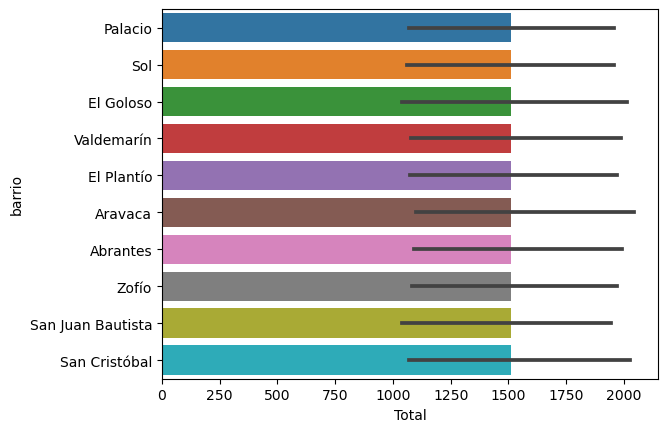

In [160]:
#gráfico de barrios
sns.barplot(x='Total', y='barrio', data=df2022)


In [140]:
#Tabla de género y total de personas extranjeras
pivot_mad22= pd.pivot_table(df2022, values='Total', index=['Sexo'], aggfunc=np.sum)
print(pivot_mad22)

          Total
Sexo           
Hombres  258350
Mujeres  316260


In [141]:
#Web Scrapping datos.gob.es

#%pip install requests
import requests as req   
import json


In [142]:
url='https://datos.gob.es/es/catalogo/l01280796-inmigrantes-personas-atendidas-en-el-servicio-de-informacion-y-orientacion'

In [143]:
#Request, conctada
res = req.get(url)
res

<Response [200]>

In [144]:
data = res.text
#print(data)

In [145]:
#Importando beautiful Soup
import requests
from bs4 import BeautifulSoup


In [146]:
soup = BeautifulSoup(data, "html.parser")

In [147]:
#encontramos links que tengan coincidencias con el contenido de "csv"
links = soup.find_all('a')
csv_links = [link.get('href')
              for link in links if link.get('href') and '.csv' in link.get('href')]

In [148]:
csv_links

['https://datos.gob.es/es/catalogo/l01280796-inmigrantes-personas-atendidas-en-el-servicio-de-informacion-y-orientacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-5-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-7-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-9-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-10-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-12-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-14-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-16-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-18-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-20-inmigrantes-informacion.csv',
 'https://datos.madrid.es/egob/catalogo/211388-22-inmigrantes-informacion.csv']

In [149]:
url_inm = 'https://datos.madrid.es/egob/catalogo/211388-22-inmigrantes-informacion.csv'
df2022 = pd.read_csv(url_inm, sep=';',encoding='ISO-8859-1')

In [150]:
#Descargamos el link del año 2022 para obtener datos
df2022.head()


,Año,Mes,Sexo,Edad,Nacionalidad - País,Áreas geográficas,Nivel de estudios,Información gral,Sist. Jco Adttvo 1,Sist. Jco Adttvo 2,Sist. Jco Adttvo 3,Sist. Jco Adttvo 4,Sist. Salud,Sist. Empleo,Sist. Servicios Sociales,Sist. Educación,Sist. Vivienda,Situación Administrativa,Oficina
0,2022.0,Enero,Mujer,31 a 50 años,colombia,América Latina,Secundaria,NaN,tasas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
1,2022.0,Enero,Mujer,31 a 50 años,honduras,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
2,2022.0,Enero,Hombre,31 a 50 años,perú,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Irregular,Oficina Norte
3,2022.0,Enero,Mujer,31 a 50 años,colombia,América Latina,Secundaria,NaN,Arraigo Social,NaN,NaN,NaN,NaN,Habilidades y técnicas BAE,NaN,NaN,NaN,Turista,Oficina Norte
4,2022.0,Enero,Mujer,31 a 50 años,honduras,América Latina,Secundaria,NaN,Cita Brigada Provincial Extranjería,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ART,Oficina Norte


In [151]:
#Análisis exploratorio
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24036 entries, 0 to 24035
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       23745 non-null  float64
 1   Mes                       23745 non-null  object 
 2   Sexo                      23746 non-null  object 
 3   Edad                      23746 non-null  object 
 4   Nacionalidad - País       23743 non-null  object 
 5   Áreas geográficas         23746 non-null  object 
 6   Nivel de estudios         23746 non-null  object 
 7   Información gral          1849 non-null   object 
 8   Sist. Jco Adttvo 1        20833 non-null  object 
 9   Sist. Jco Adttvo 2        3340 non-null   object 
 10  Sist. Jco Adttvo 3        478 non-null    object 
 11  Sist. Jco Adttvo 4        69 non-null     object 
 12  Sist. Salud               534 non-null    object 
 13  Sist. Empleo              1320 non-null   object 
 14  Sist. 

In [152]:
nan_cols = df2022.isna().sum()

nan_cols[nan_cols>0]

Año                           291
Mes                           291
Sexo                          290
Edad                          290
Nacionalidad - País           293
Áreas geográficas             290
Nivel de estudios             290
Información gral            22187
Sist. Jco Adttvo 1           3203
Sist. Jco Adttvo 2          20696
Sist. Jco Adttvo 3          23558
Sist. Jco Adttvo 4          23967
Sist. Salud                 23502
Sist. Empleo                22716
Sist. Servicios Sociales    23514
Sist. Educación             23188
Sist. Vivienda              23946
Situación Administrativa      290
Oficina                       291
dtype: int64

In [153]:
#Elimino las 291 últimas filas porque estabana en Blanco, "nan"
df2022.drop(df2022.index[-291:], inplace=True)

In [154]:
top_nacionalidades = df2022['Nacionalidad - País'].value_counts().head(5)
print(top_nacionalidades)

Perú         4515
Colombia     3172
Honduras     1967
Venezuela    1771
Ecuador      1770
Name: Nacionalidad - País, dtype: int64


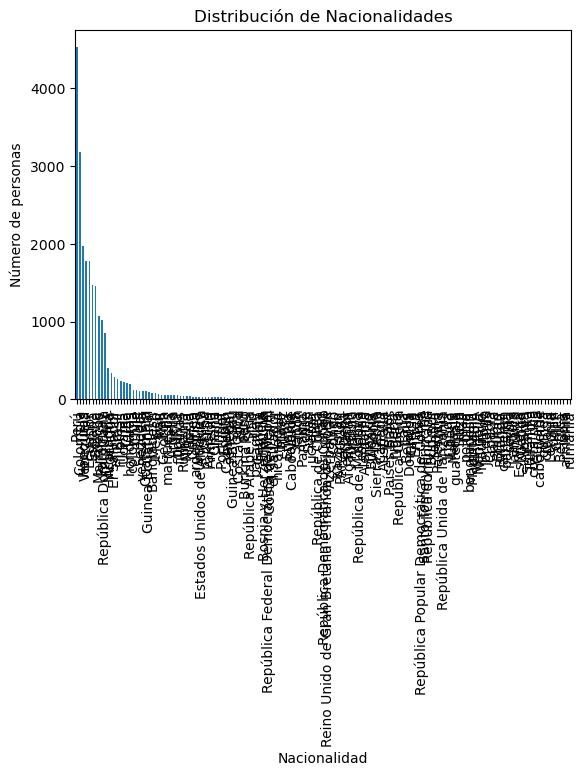

In [155]:
#histograma general
df2022['Nacionalidad - País'].value_counts().plot(kind='bar')
plt.title('Distribución de Nacionalidades')
plt.xlabel('Nacionalidad')
plt.ylabel('Número de personas')
plt.show()

In [156]:
#Tabla cruzada de situación administrativa y género

Cross= pd.crosstab(df2022['Situación Administrativa'], df2022['Sexo'])
Cross

Sexo,Hombre,Mujer,mujer
Situación Administrativa,,,
A R,106,261,0
ART,2332,6682,0
Asilo / Refugio,438,723,0
Comunitario,939,2548,0
Estudiante,212,411,1
Familiar Comunitario,378,924,0
Irregular,2043,4408,0
Persona desde el extranjero,21,51,0
Turista,451,815,0


In [157]:
#exportar a csv.
Cross.to_csv('nombre_del_archivo.csv', index=True)